# 다중분류를 위한 OVR(OVA)
- 분류 클래스 수 만큼 2진 분류기를 생성하여 다중 분류 진행

In [115]:
# 모듈 로딩 

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

데이터셋 : load_digits
- 내장 데이터셋 
- 이미지 데이터셋 => 8 * 8 크기 이미지 
- 이미지 라벨/타겟 => 숫자 0 ~ 9까지 즉, 총 10개의 클래스
- 흑백 이미지

In [116]:
# 데이터 로딩
feature_df, target_sr = load_digits(as_frame=True, return_X_y=True) # feature_df는 DF로 target_sr은 series로 들어감
print(feature_df.shape, feature_df.ndim, target_sr.shape, target_sr.ndim)

(1797, 64) 2 (1797,) 1


In [117]:
feature_df.head(1)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0


값의 범위가 13, 9 등 다 다르므로 스케일링 필요
- 이미지는 음수가 없기 때문에 255로 나누거나 MinMax 사용 ㅇ

In [118]:
# 이미지 픽셀 범위 : 0 ~ 255 
feature_df = feature_df / 255

In [119]:
feature_df.head(1)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,0.019608,0.05098,0.035294,0.003922,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.023529,0.05098,0.039216,0.0,0.0,0.0


In [120]:
target_sr.head()

0    0
1    1
2    2
3    3
4    4
Name: target, dtype: int32

In [121]:
# 이미지 데이터 시각화 
import matplotlib.pyplot as plt 

# 그림은 2차원이므로 feature_df.iloc[0]를 2차원으로 만들어야 ㅎ마 
feature_df.iloc[8].to_numpy().reshape(-1,8) 

array([[0.        , 0.        , 0.03529412, 0.05490196, 0.03137255,
        0.00392157, 0.        , 0.        ],
       [0.        , 0.        , 0.04705882, 0.05490196, 0.05490196,
        0.04705882, 0.        , 0.        ],
       [0.        , 0.        , 0.03529412, 0.03921569, 0.        ,
        0.05882353, 0.01568627, 0.        ],
       [0.        , 0.        , 0.01176471, 0.0627451 , 0.04705882,
        0.05490196, 0.00784314, 0.        ],
       [0.        , 0.        , 0.01568627, 0.0627451 , 0.0627451 ,
        0.00784314, 0.        , 0.        ],
       [0.        , 0.01176471, 0.0627451 , 0.03137255, 0.03921569,
        0.05098039, 0.00784314, 0.        ],
       [0.        , 0.00392157, 0.05882353, 0.00392157, 0.01176471,
        0.0627451 , 0.03137255, 0.        ],
       [0.        , 0.        , 0.04313725, 0.0627451 , 0.05882353,
        0.04313725, 0.00392157, 0.        ]])

-> 그림 데이터

In [122]:
feature_df.shape

(1797, 64)

In [123]:
img_data = feature_df.iloc[1796].to_numpy().reshape(-1,8)
print(img_data.shape)

(8, 8)


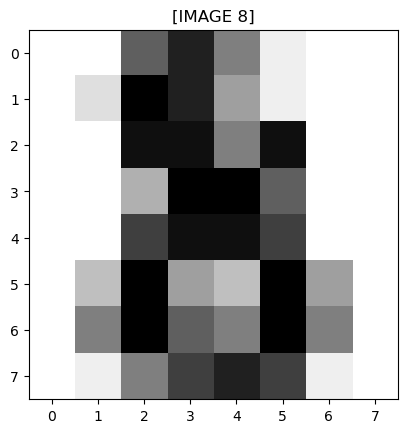

In [124]:
# 시각화 
# plt.figure(figsize=(1,1))
plt.imshow(img_data, cmap='binary')
plt.title(f'[IMAGE {target_sr[1796]}]')
plt.show()

## 학습용 데이터셋 준비 : trainDS, testDS

In [125]:
x_train, x_test, y_train, y_test = train_test_split(feature_df, target_sr, stratify=target_sr, random_state=10)

OVR(Over vs Rest) 또는 OVA(Over vs All)
- 클래스마다 이진 분류기를 만들어서 가장 높은 결정점수 낸 클래스 선택

In [126]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm.SVC import SVC

ovr_clf = OneVsRestClassifier(LogisticRegression()) # LogisticRegression대신 KNeighborsClassifier(), SVC() 가능 -> 해당 모델로 10개 생성 
ovr_clf.fit(x_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [127]:
# 오류 뜨면 max_iter = 10000

# ovr_clf = OneVsRestClassifier(LogisticRegression(max_iter = 10000))
# ovr_clf.fit(x_train, y_train)

In [128]:
#  모델 파라미터 
print(f'ovr_clf.estimators_ : {len(ovr_clf.estimators_)}개') # 10개의 분류기 존재 
print((f'ovr_clf.classes_ : {ovr_clf.classes_}'))
print(f'ovr_clf.classes_ : {ovr_clf.n_classes_}')
print(f'ovr_clf.label_binarizer_ : {ovr_clf.label_binarizer_}')

ovr_clf.estimators_ : 10개
ovr_clf.classes_ : [0 1 2 3 4 5 6 7 8 9]
ovr_clf.classes_ : 10
ovr_clf.label_binarizer_ : LabelBinarizer(sparse_output=True)


In [129]:
for idx in range(ovr_clf.n_classes_):
    print(f'[{idx} 분류기]', ovr_clf.estimators_[idx].coef_, ovr_clf.estimators_[idx].intercept_)

[0 분류기] [[ 0.00000000e+00 -1.17211304e-01 -3.61976716e-01  6.37992922e-01
  -2.59516080e-01 -1.28004235e+00 -5.49554643e-01 -5.15394269e-02
  -2.48867098e-03 -4.50770969e-01  8.75529916e-01  6.75669778e-01
   7.61063082e-01  1.42181524e+00 -3.72707245e-01 -4.79082752e-02
  -8.76059290e-04  4.83967023e-01  1.73526178e+00 -5.66661564e-01
  -1.82795465e+00  2.02796255e+00  6.80700634e-01 -2.29999080e-02
  -2.33809952e-04  1.17166680e+00  1.43124099e+00 -2.77339186e+00
  -4.06945241e+00  6.21786489e-01  1.75117326e+00 -1.03944146e-03
   0.00000000e+00  1.44042261e+00  1.66074394e+00 -3.35466822e+00
  -4.16837941e+00 -1.82033356e-01  1.70005379e+00  0.00000000e+00
  -6.22709065e-03  7.53400694e-01  2.70397833e+00 -2.23501260e+00
  -2.41565152e+00  1.07409288e+00  9.19098746e-01 -1.27278179e-02
  -1.92354211e-03  2.32108843e-02  2.27842435e+00  3.91210660e-01
   5.69341433e-01  1.80144114e+00 -6.51051162e-01 -7.93462636e-02
  -3.44895266e-04 -1.12691963e-01 -5.45168374e-01  6.15148191e-01
  

In [130]:
for idx in range(ovr_clf.n_classes_):
    print(f'[{ovr_clf.estimators_[idx]} 분류기]', ovr_clf.estimators_[idx].coef_, ovr_clf.estimators_[idx].intercept_)

[LogisticRegression() 분류기] [[ 0.00000000e+00 -1.17211304e-01 -3.61976716e-01  6.37992922e-01
  -2.59516080e-01 -1.28004235e+00 -5.49554643e-01 -5.15394269e-02
  -2.48867098e-03 -4.50770969e-01  8.75529916e-01  6.75669778e-01
   7.61063082e-01  1.42181524e+00 -3.72707245e-01 -4.79082752e-02
  -8.76059290e-04  4.83967023e-01  1.73526178e+00 -5.66661564e-01
  -1.82795465e+00  2.02796255e+00  6.80700634e-01 -2.29999080e-02
  -2.33809952e-04  1.17166680e+00  1.43124099e+00 -2.77339186e+00
  -4.06945241e+00  6.21786489e-01  1.75117326e+00 -1.03944146e-03
   0.00000000e+00  1.44042261e+00  1.66074394e+00 -3.35466822e+00
  -4.16837941e+00 -1.82033356e-01  1.70005379e+00  0.00000000e+00
  -6.22709065e-03  7.53400694e-01  2.70397833e+00 -2.23501260e+00
  -2.41565152e+00  1.07409288e+00  9.19098746e-01 -1.27278179e-02
  -1.92354211e-03  2.32108843e-02  2.27842435e+00  3.91210660e-01
   5.69341433e-01  1.80144114e+00 -6.51051162e-01 -7.93462636e-02
  -3.44895266e-04 -1.12691963e-01 -5.45168374e-01

coef_ 는 feature 개수 만큼 나오므로 64개 나옴

In [131]:
ovr_clf.predict_proba(x_test.iloc[:2])

array([[0.0787733 , 0.07785004, 0.11759237, 0.19225415, 0.04654342,
        0.10645157, 0.08302338, 0.06987207, 0.09086352, 0.13677619],
       [0.11828699, 0.06343049, 0.07983869, 0.15454072, 0.06514682,
        0.10996318, 0.05301651, 0.08138243, 0.09232361, 0.18207057]])

- 0 => 0 vs [1,2,3,4,5,6,7,8,9] => 2진 분류 => 0일 확률 
- 1 => 1 vs [0,2,3,4,5,6,7,8,9] => 2진 분류 => 1일 확률 
- 2 => 2 vs [0,1,3,4,5,6,7,8,9] => 2진 분류 => 2일 확률 
- 3 => 3 vs [0,1,2,4,5,6,7,8,9] => 2진 분류 => 3일 확률 
- 4 => 4 vs [0,1,2,3,5,6,7,8,9] => 2진 분류 => 4일 확률 
- 5 => 5 vs [0,1,2,3,4,6,7,8,9] => 2진 분류 => 5일 확률 
- 6 => 6 vs [0,1,2,3,4,5,7,8,9] => 2진 분류 => 6일 확률 
- 7 => 7 vs [0,1,2,3,4,5,6,8,9] => 2진 분류 => 7일 확률 
- 8 => 8 vs [0,1,2,3,4,5,6,7,9] => 2진 분류 => 8일 확률 
- 9 => 9 vs [0,1,2,3,4,5,6,7,8] => 2진 분류 => 9일 확률 


y = f1*coef_[0] + f2*coef_[1] ... f62*coef_[64] 식을 확률로 나타내기 위해 시그모이드 함수 사용 

- numpy -> 1/(1+np.exp(-y))

- scipy -> scipy.expit(y)

In [132]:
ovr_clf.predict_proba(x_test.iloc[:1])

array([[0.0787733 , 0.07785004, 0.11759237, 0.19225415, 0.04654342,
        0.10645157, 0.08302338, 0.06987207, 0.09086352, 0.13677619]])

In [135]:
ovr_clf.predict_proba(x_test.iloc[:1]).argmax

3

In [133]:
ovr_clf.decision_function(x_train.iloc[:1])

array([[-2.50438026, -2.36038813, -2.25864081, -1.81855559, -2.49165847,
        -1.91708477, -2.10052557, -2.45299917, -2.44828016, -2.34024107]])

In [138]:
ovr_clf.predict_proba(x_test.iloc[:1]).max(), ovr_clf.predict_proba(x_test.iloc[:1]).argmax()

(0.19225414581646177, 3)

In [142]:
proba = ovr_clf.predict_proba(x_test[:5])
proba, proba.argmax(axis=1), proba.max(axis=1)
# 행방향에서 가장 큰 값을 찾기 위함 

(array([[0.0787733 , 0.07785004, 0.11759237, 0.19225415, 0.04654342,
         0.10645157, 0.08302338, 0.06987207, 0.09086352, 0.13677619],
        [0.11828699, 0.06343049, 0.07983869, 0.15454072, 0.06514682,
         0.10996318, 0.05301651, 0.08138243, 0.09232361, 0.18207057],
        [0.08495929, 0.08861693, 0.06808398, 0.08225892, 0.11548253,
         0.11978089, 0.05975883, 0.18208459, 0.09322917, 0.10574487],
        [0.0918344 , 0.12082816, 0.09048671, 0.07607   , 0.09319821,
         0.10774621, 0.07351068, 0.0998756 , 0.15659425, 0.08985579],
        [0.0767191 , 0.08928901, 0.06765447, 0.04952569, 0.18302774,
         0.12253555, 0.10407496, 0.14374714, 0.08563126, 0.07779507]]),
 array([3, 9, 7, 8, 4], dtype=int64),
 array([0.19225415, 0.18207057, 0.18208459, 0.15659425, 0.18302774]))

OVO은 경우의 수가 너무 많이 나오므로 OVR 주 사용